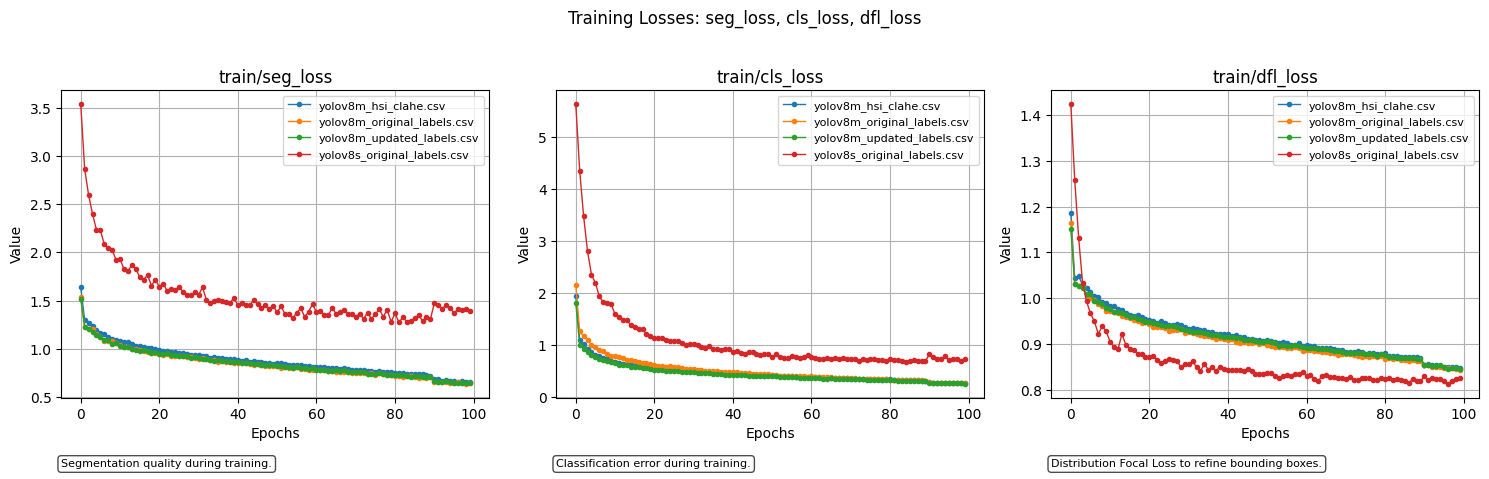

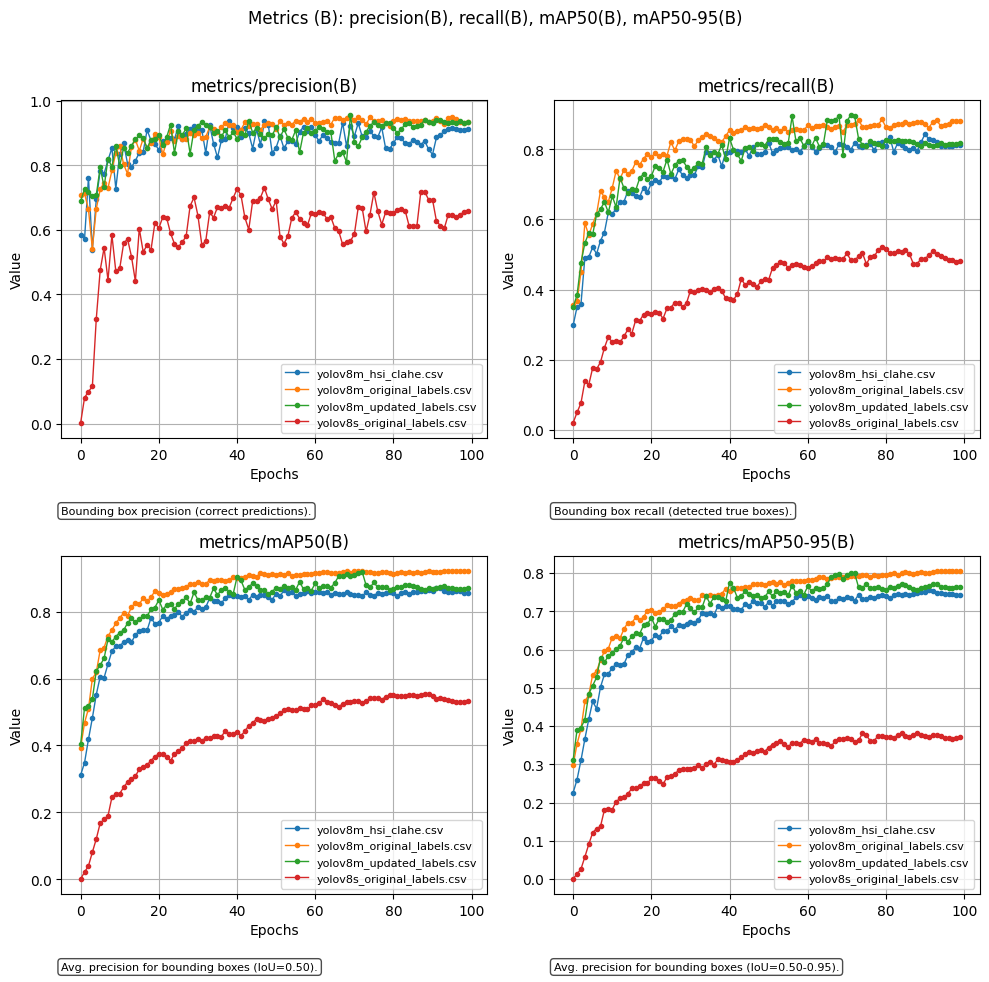

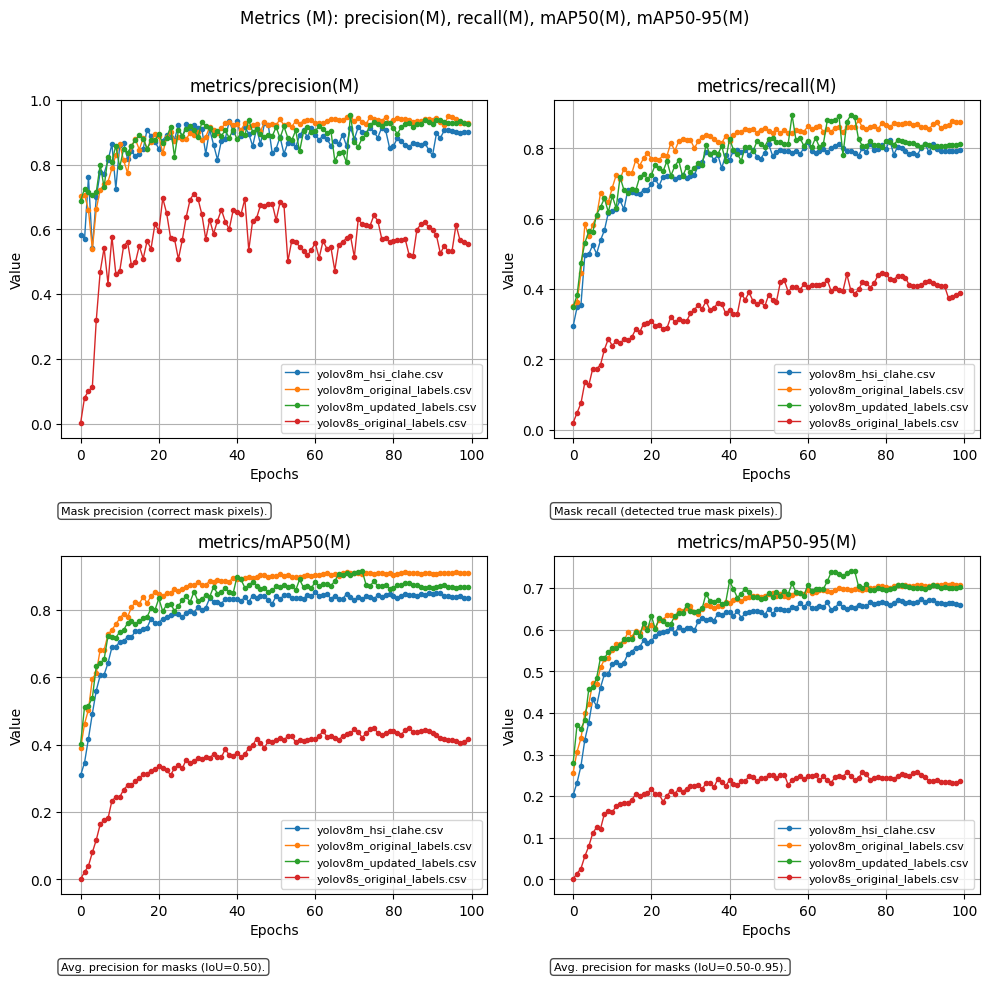

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the folder containing the CSV files
folder_path = os.getcwd()

# Simplified descriptions of each metric
metric_descriptions = {
    'train/seg_loss': 'Segmentation quality during training.',
    'train/cls_loss': 'Classification error during training.',
    'train/dfl_loss': 'Distribution Focal Loss to refine bounding boxes.',
    'metrics/precision(B)': 'Bounding box precision (correct predictions).',
    'metrics/recall(B)': 'Bounding box recall (detected true boxes).',
    'metrics/mAP50(B)': 'Avg. precision for bounding boxes (IoU=0.50).',
    'metrics/mAP50-95(B)': 'Avg. precision for bounding boxes (IoU=0.50-0.95).',
    'metrics/precision(M)': 'Mask precision (correct mask pixels).',
    'metrics/recall(M)': 'Mask recall (detected true mask pixels).',
    'metrics/mAP50(M)': 'Avg. precision for masks (IoU=0.50).',
    'metrics/mAP50-95(M)': 'Avg. precision for masks (IoU=0.50-0.95).'
}

# Function to load CSV files, clean column names, and compare models for each metric
def plot_yolov8_metrics(folder_path):
    # Search through all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # Metrics for the three figures
    figure1_metrics = ['train/seg_loss', 'train/cls_loss', 'train/dfl_loss']
    figure2_metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
    figure3_metrics = ['metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']

    # Load and clean column names for all CSV files
    data_frames = {}
    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        # Clean column names (remove leading/trailing spaces)
        df.columns = df.columns.str.strip()
        data_frames[file_name] = df

    # Function to create subplots for the given metrics
    def plot_metrics(metrics, fig_title, n_rows, n_cols):
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
        axes = axes.flatten()  # Flatten the axes array for easy indexing

        for idx, metric in enumerate(metrics):
            ax = axes[idx]
            for file_name, df in data_frames.items():
                if metric in df.columns:
                    # Plot for the current metric, for each model (CSV file)
                    ax.plot(df.index, df[metric], marker='o', markersize=3, linewidth=1, label=file_name)
            ax.set_title(metric)
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Value')
            ax.grid(True)
            # Automatically place legend in a location with space
            ax.legend(loc='best', fontsize=8)
            
            # Add small text box below the graph explaining the metric
            description = metric_descriptions.get(metric, 'No description available.')
            # Adjusting the text box with left alignment and same width as the plot
            ax.text(0, -0.2, description, transform=ax.transAxes, fontsize=8, ha='left', va='top', 
                    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3', ec='black'))

        # Set the main title for the figure
        plt.suptitle(fig_title)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ensure layout is clean and space for title
        plt.show()

    # Plot each figure with its corresponding metrics
    plot_metrics(figure1_metrics, 'Training Losses: seg_loss, cls_loss, dfl_loss', n_rows=1, n_cols=3)
    plot_metrics(figure2_metrics, 'Metrics (B): precision(B), recall(B), mAP50(B), mAP50-95(B)', n_rows=2, n_cols=2)
    plot_metrics(figure3_metrics, 'Metrics (M): precision(M), recall(M), mAP50(M), mAP50-95(M)', n_rows=2, n_cols=2)

# Call the function to plot the YOLOv8 metrics
plot_yolov8_metrics(folder_path)
